### **LIBRARIES IMPORT**

In [13]:
#LIBRARIES IMPORT
import matplotlib.pyplot as plt #for plotting images
import tensorflow as tf #for constructing convolutional neural networks
import numpy as np #for handling arrays
import pandas as pd #for handling dataframes
import keras.utils as image #for loading custom images
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D
import os
import cv2
from google.colab import drive #for accessing files on drive

### **DATA IMPORT**

In [112]:
#DATA IMPORT
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### **DATA OBSERVATION**

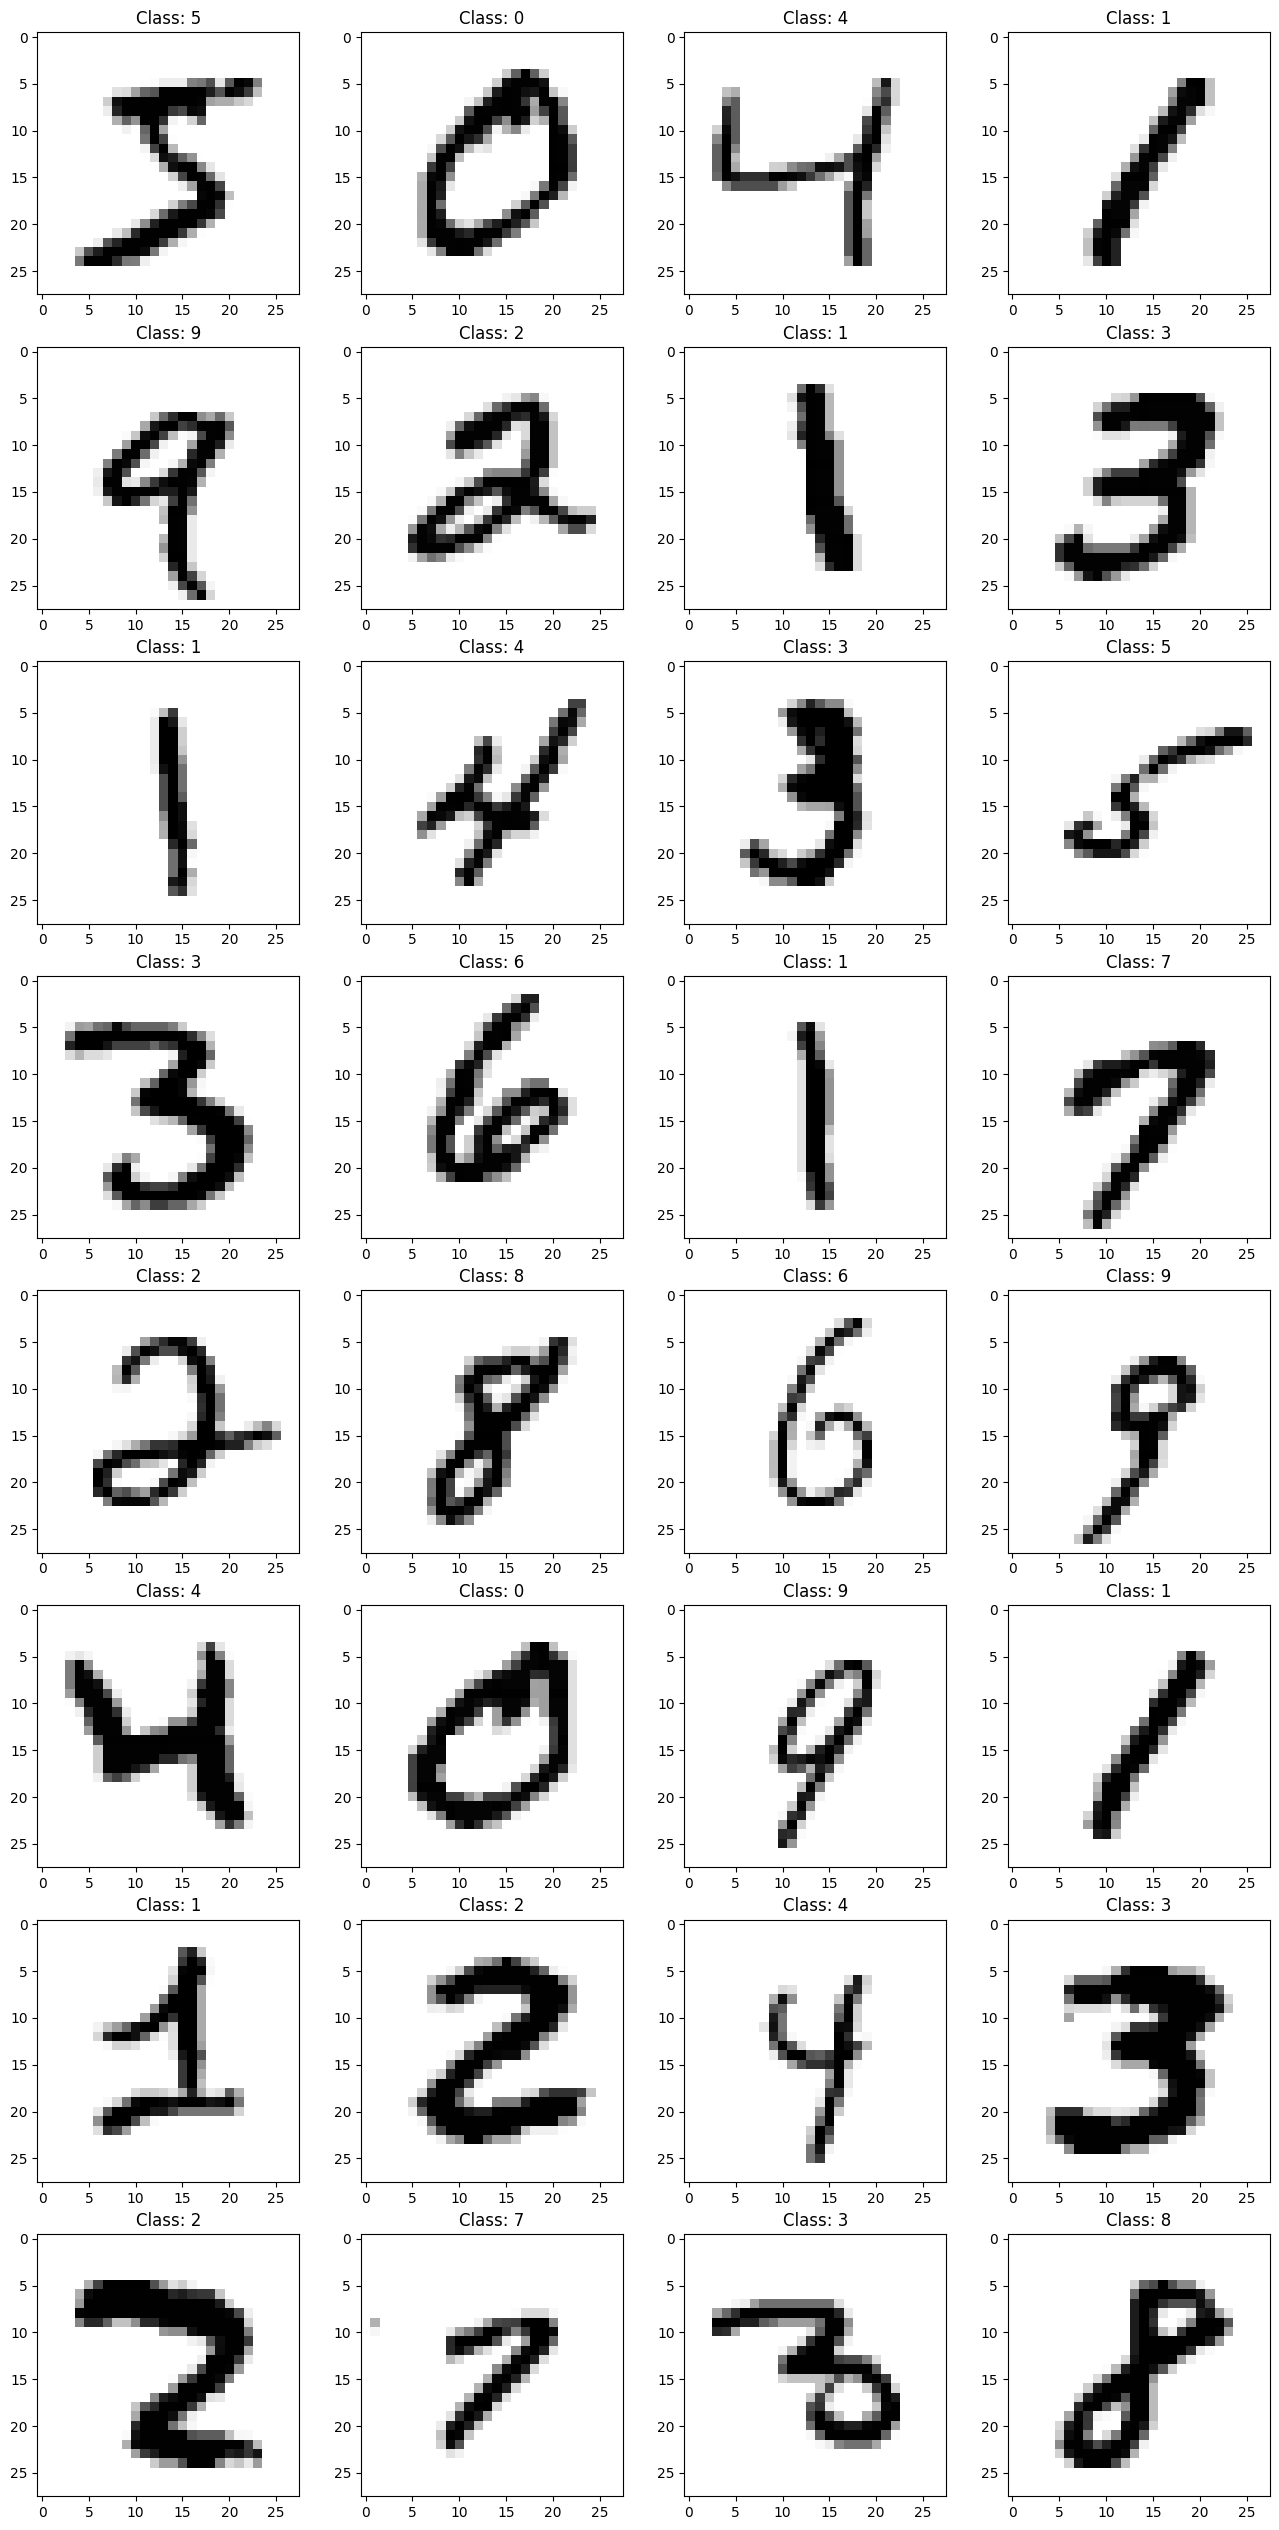

In [138]:
#DATA OBSERVATION
#Let's plot the first 32 images of our data to get a grasp of what we are working with.
fig = plt.figure(figsize=(16, 32))
columns = 4
rows = 8
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.title("Class: " + str(y_train[i - 1]))
    plt.imshow(x_train[i - 1],cmap=plt.cm.binary)
plt.show()

#The dataset includes 28x28 grayscale images.

### **MODEL CONSTRUCTION**

In [4]:
#MODEL CONSTRUCTION
#Let's construct a simple model with a convolutional layer, a max pooling layer, and two dense layers.
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
model=tf.keras.models.Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### **MODEL TRAINING**

In [5]:
#MODEL TRAINING
#Let's train our model for 10 epochs.
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 81s 42ms/step - loss: 0.1568 - accuracy: 0.9507
Epoch 2/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0376 - accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 5/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0206 - accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0182 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0116 - accuracy: 0.9964
Epoch 9/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0115 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 76s 40m

### **MODEL TESTING**

In [6]:
#MODEL TESTING
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0559 - accuracy: 0.9874
0.05591064319014549 0.9873999953269958


In [7]:
predictions=model.predict(x_test)
predictions=np.argmax(predictions, axis=1)
wrong=np.where(y_test != predictions)
wrong=wrong[0]

313/313 [==============================] - 3s 9ms/step


In [8]:
print('Error rate:',(len(wrong)/len(y_test))*100,'\t%')

#It seems like our model is performing pretty well with just 1 percent error.

Error rate: 1.26 	%


### **RESULT OBSERVATION**

In [41]:
#RESULT OBSERVATION
#Let's see how often each class is predicted wrong.
wrong_quant0 = len((np.where(np.logical_and(y_test != predictions,y_test==0))[0]))
wrong_quant1 = len((np.where(np.logical_and(y_test != predictions,y_test==1))[0]))
wrong_quant2 = len((np.where(np.logical_and(y_test != predictions,y_test==2))[0]))
wrong_quant3 = len((np.where(np.logical_and(y_test != predictions,y_test==3))[0]))
wrong_quant4 = len((np.where(np.logical_and(y_test != predictions,y_test==4))[0]))
wrong_quant5 = len((np.where(np.logical_and(y_test != predictions,y_test==5))[0]))
wrong_quant6 = len((np.where(np.logical_and(y_test != predictions,y_test==6))[0]))
wrong_quant7 = len((np.where(np.logical_and(y_test != predictions,y_test==7))[0]))
wrong_quant8 = len((np.where(np.logical_and(y_test != predictions,y_test==8))[0]))
wrong_quant9 = len((np.where(np.logical_and(y_test != predictions,y_test==9))[0]))
wrong_quants = {
    '0':wrong_quant0,
    '1':wrong_quant1,
    '2':wrong_quant2,
    '3':wrong_quant3,
    '4':wrong_quant4,
    '5':wrong_quant5,
    '6':wrong_quant6,
    '7':wrong_quant7,
    '8':wrong_quant8,
    '9':wrong_quant9,
}
df = pd.DataFrame(wrong_quants,index = ['Times predicted wrong'])
print(df)

#Looking at the table, it seems like we need to write our 5, 7, and 9 more carefully.

                       0  1   2  3  4   5   6   7  8   9
Times predicted wrong  4  6  14  4  4  22  19  24  6  23


### **BIAS OF THE DATASET**

[  3   6   8  14  23  24  40  59  67  70  72  77  78  99 102 104 105 112
 113 124 128 134 152 174 177 184 200 201 205 208 211 224 231 248 251 269
 270 276 290 309 310 315 345 351 355 357 358 366 382 394 397 398 406 408
 416 443 447 450 454 455 466 470 475 484]


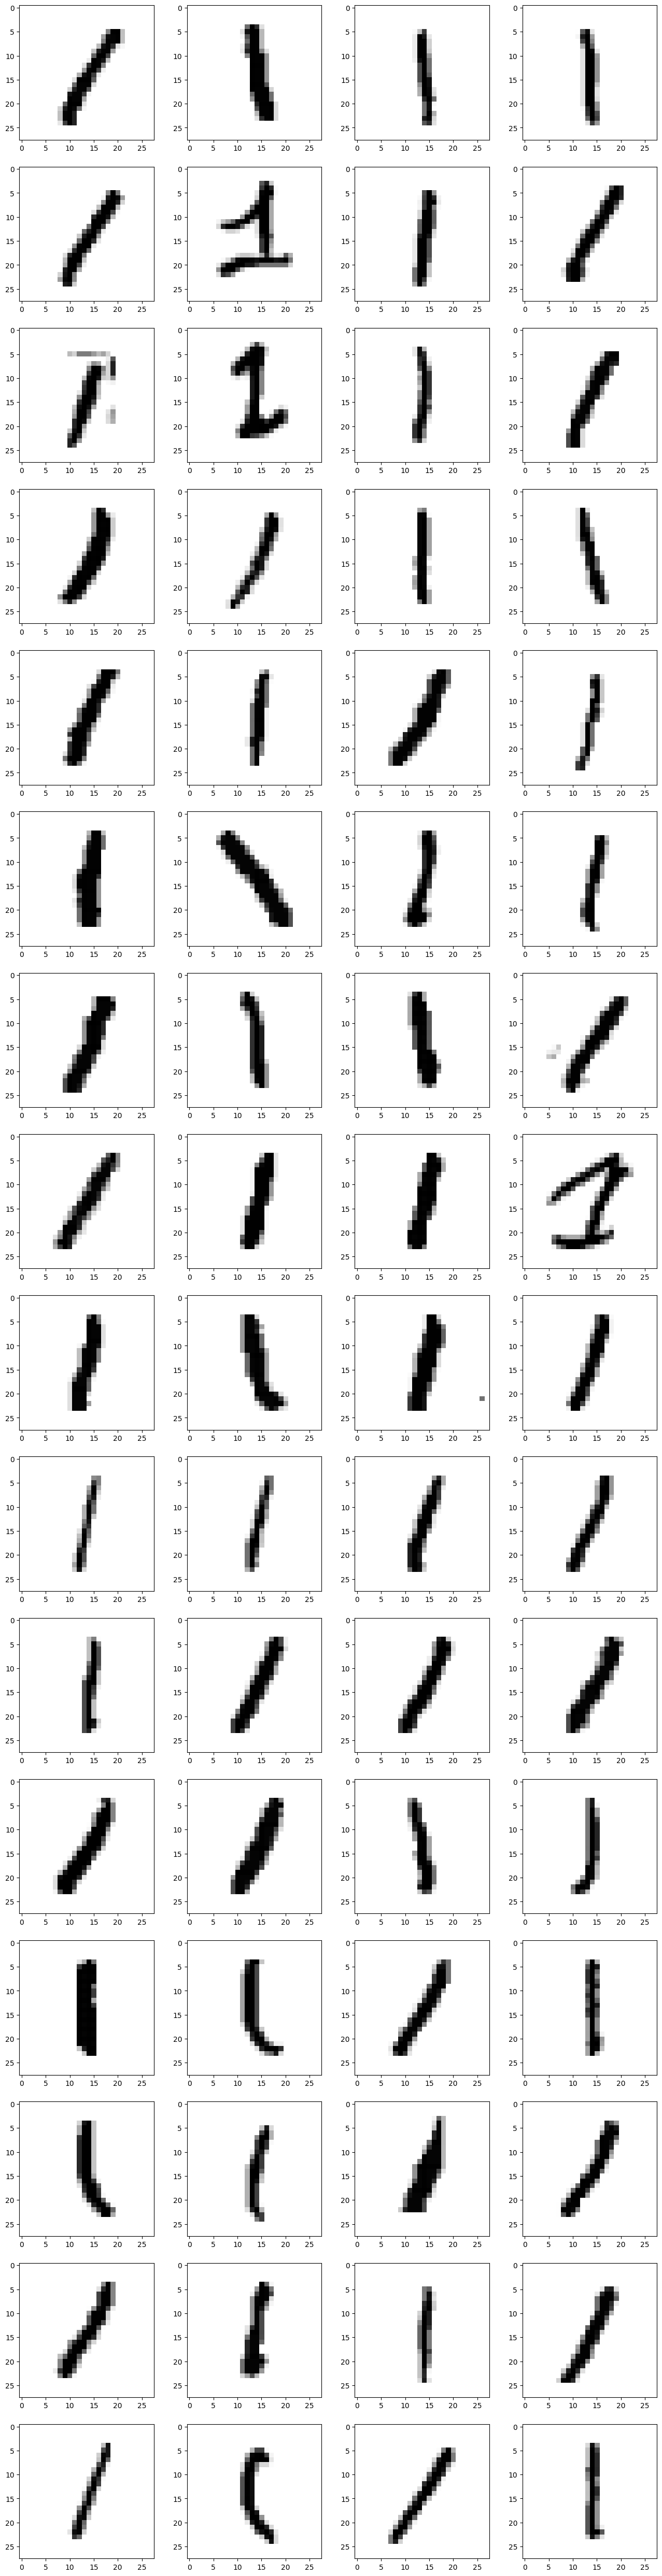

'After running the code, we can see that in the first 64 number 1,\nonly 3 were written with a top angle and a bottom line.\nThe rest are just vertical lines.\nSo if you ever feed this model images of handwritten number 1,\nmake sure they are written as vertical lines.'

In [135]:
#BIAS OF THE DATASET
#The dataset may be biased. Let's verify that by plotting some of our handwritten number 1.

idxs_1 = np.where(y_train == 1)[0]
x_train1 = []
y_train1 = []
for a in idxs_1[:64]:
  x_train1.append(x_train[a])
  y_train1.append(y_train[a])
print(idxs_1[:64])
fig = plt.figure(figsize=(16, 64))
columns = 4
rows = 16
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train1[i - 1],cmap=plt.cm.binary)
plt.show()

'''After running the code, we can see that in the first 64 number 1,
only 3 were written with top angles and bottom lines.
The rest are just vertical lines.
So if you ever feed this model images of handwritten number 1,
make sure they are written as vertical lines.'''

[ 15  29  38  42  52  71  79  84  91  96 101 103 123 140 141 148 158 168
 185 193 196 212 214 223 230 243 258 263 288 301 305 307 324 337 340 349
 353 370 371 377 384 387 411 422 426 436 446 467 468 478 483 497 505 511
 518 521 522 560 562 567 586 599 608 611]


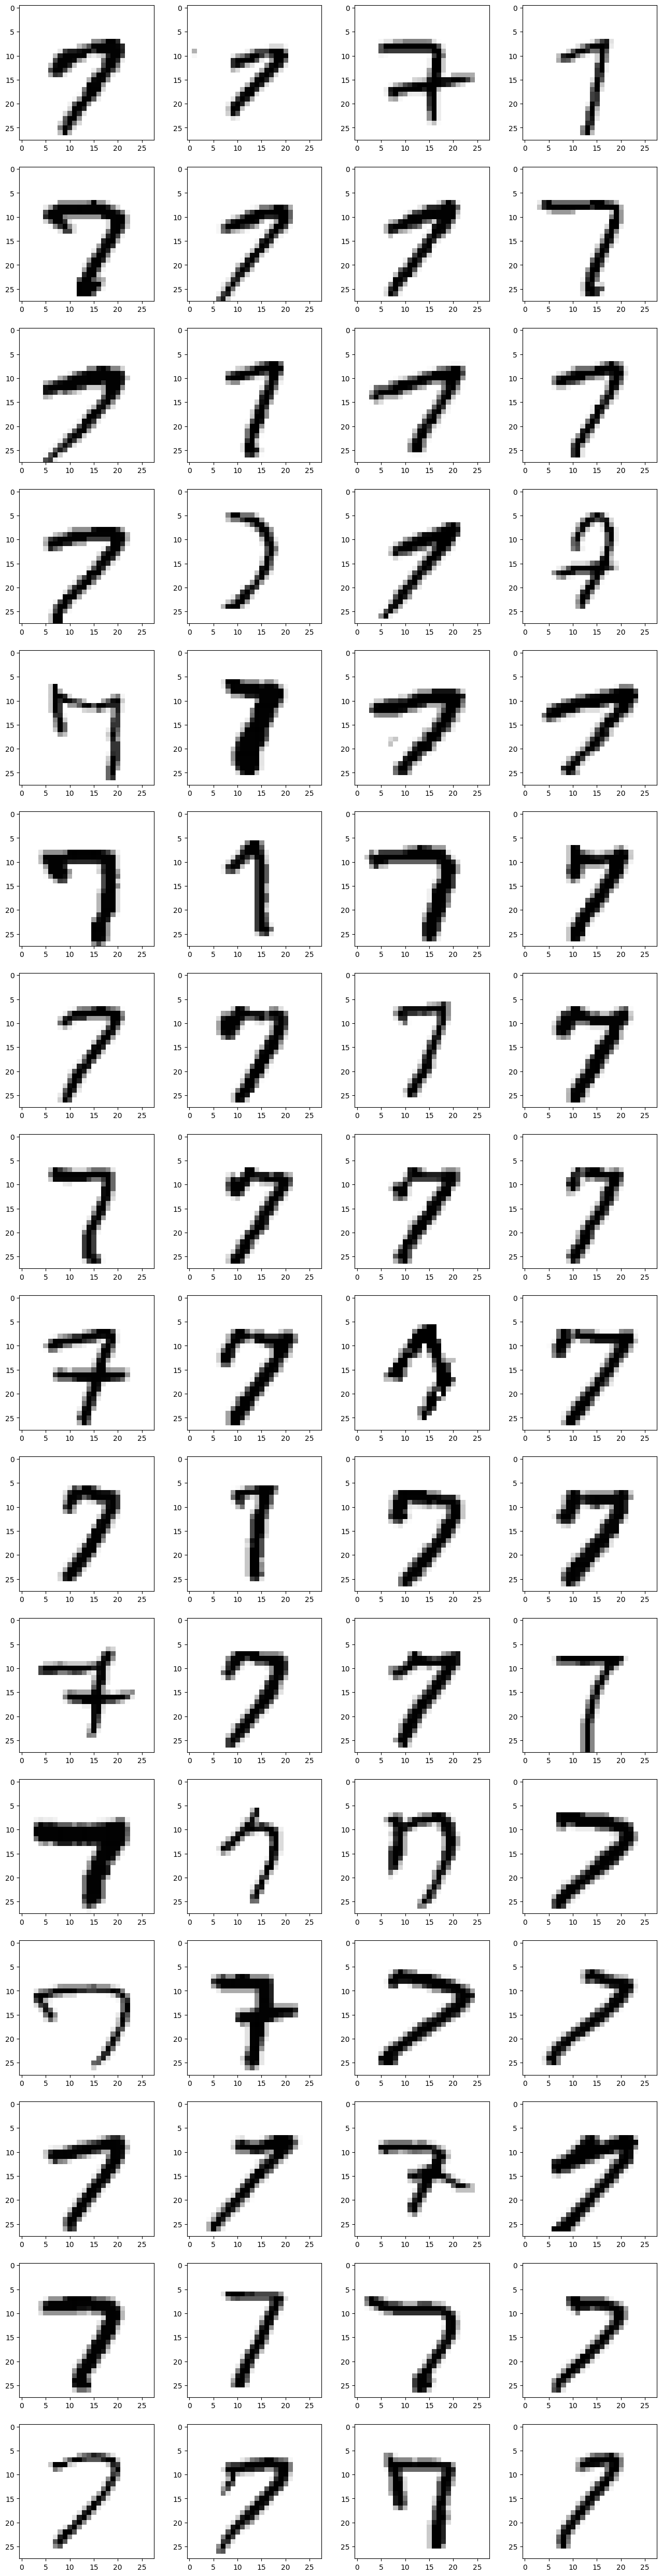

'After running the code, we can see that in the first 64 number 1,\nonly 3 were written with a top angle and a bottom line.\nThe rest are just vertical lines.\nSo if you ever feed this model images of handwritten number 1,\nmake sure they are written as vertical lines.'

In [137]:
#Let's also see some images of handwritten number 7.

idxs_7 = np.where(y_train == 7)[0]
x_train7 = []
y_train7 = []
for a in idxs_7[:64]:
  x_train7.append(x_train[a])
  y_train7.append(y_train[a])
print(idxs_7[:64])
fig = plt.figure(figsize=(16, 64))
columns = 4
rows = 16
for i in range(1, columns*rows + 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(x_train7[i - 1],cmap=plt.cm.binary)
plt.show()

'''After running the code, we can see that in the first 64 number 7,
only 5 were written with lines across the middle.
So if you ever feed this model images of handwritten number 7,
make sure to exclude lines across the middle.'''

### **LOADING CUSTOM IMAGES**

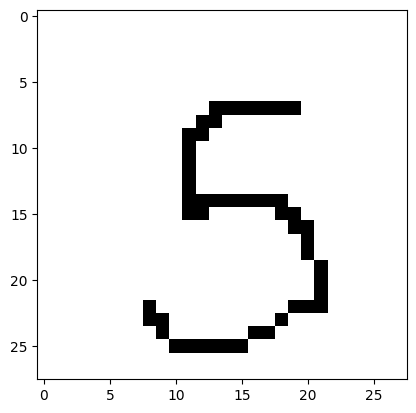

In [179]:
#LOADING CUSTOM IMAGES
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/Untitled.png')
img_gscale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gscale=np.invert(img_gscale)
plt.imshow(img_gscale,cmap=plt.cm.binary)

In [180]:
test=np.array([img_gscale,img_gscale])
pred=model.predict(test)
pred=np.argmax(pred, axis=1)
print('The model predicted your image to be: ',pred[0])

'''This notebook showcases a simple convolutional neural network (CNN) to classify handwritten numbers. Also includes a part where you can input your custom images.
The Python notebook must be runned on Google Colab if you want to classify your custom images, because it has a library to access images uploaded to the Google Colab workspace.
After opening the notebook on Gooogle Colab, the code blocks in LIBRARIES IMPORT, DATA IMPORT, MODEL CONSTRUCTION, and MODEL TRAINING are required to run.
On the left of your screen, open the file menu (file symbol). Right-click to upload your .jpg or .png 28x28 images to the workspace.
Right-click your file and select "copy path". Plug it into the imread module of the second last code block, and run the last 2 code blocks.
There seems to be some bias in the dataset with the numer 7 and 9 that affected the training process, so you shouldn't expect too much when inputting your handwritten 7 and 9.'''

1/1 [==============================] - 0s 16ms/step
The model predicted your image to be:  5
